Q5
The file capmetro_UT.csv contains data from Austin's own Capital Metro bus network, including shuttles to, from, and around the UT campus. These data track ridership on buses in the UT area. Ridership is measured by an optical scanner that counts how many people embark and alight the bus at each stop. Each row in the data set corresponds to a 15-minute period between the hours of 6 AM and 10 PM, each and every day, from September through November 2018. The variables are:

timestamp: the beginning of the 15-minute window for that row of data
boarding: how many people got on board any Capital Metro bus on the UT campus in the specific 15 minute window
alighting: how many people got off ("alit") any Capital Metro bus on the UT campus in the specific 15 minute window
day_of_week and weekend: Monday, Tuesday, etc, as well as an indicator for whether it's a weekend.
temperature: temperature at that time in degrees F
hour_of_day: on 24-hour time, so 6 for 6 AM, 13 for 1 PM, 14 for 2 PM, etc.
month: July through December
Your task is to create a figure, or set of related figures, that tell an interesting story about Capital Metro ridership patterns around the UT-Austin campus during the semester in question. Provide a clear annotation/caption for each figure, but the figure(s) should be more or less stand-alone, in that you shouldn't need many, many paragraphs to convey its meaning. Rather, the figure together with a concise caption should speak for itself as far as possible.

You have broad freedom to look at any variables you'd like here -- try to find that sweet spot where you're showing genuinely interesting relationships among more than just two variables, but where the resulting figure or set of figures doesn't become overwhelming/confusing. (Faceting/panel plots might be especially useful here.)

In [2]:
import pandas as pd
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/var/folders/sn/b17hblzd5fn2bsjtr86f7c8h0000gn/T/ipykernel_57480/2531857606.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_hourly_mean = ut_metro.groupby('hour_of_day').mean()


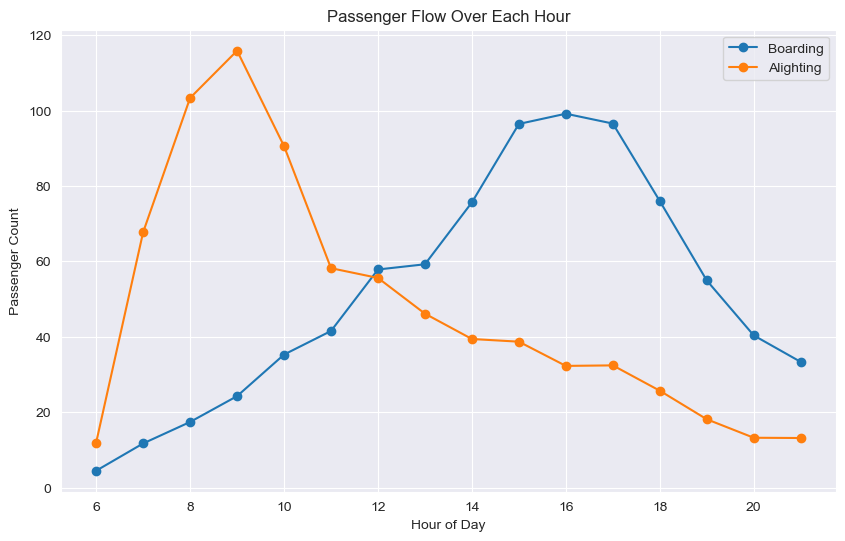

In [3]:
ut_metro = pd.read_csv('capmetro_UT.csv')
#ut_metro[:5]
import pandas as pd
import matplotlib.pyplot as plt

# turn to datetime
ut_metro['timestamp'] = pd.to_datetime(ut_metro['timestamp'])

# groupby hour and see the average number of passengers
df_hourly_mean = ut_metro.groupby('hour_of_day').mean()

# Plot boarding and alighting by hours
plt.figure(figsize=(10,6))
plt.plot(df_hourly_mean.index, df_hourly_mean['boarding'], marker='o', label='Boarding')
plt.plot(df_hourly_mean.index, df_hourly_mean['alighting'], marker='o', label='Alighting')
plt.xlabel('Hour of Day')
plt.ylabel('Passenger Count')
plt.title('Passenger Flow Over Each Hour')
plt.legend()
plt.grid(True)
plt.show()


Students predominantly arrive on campus in the morning and depart in the afternoon. Interestingly, the number of arrivals and departures is equal at noon.

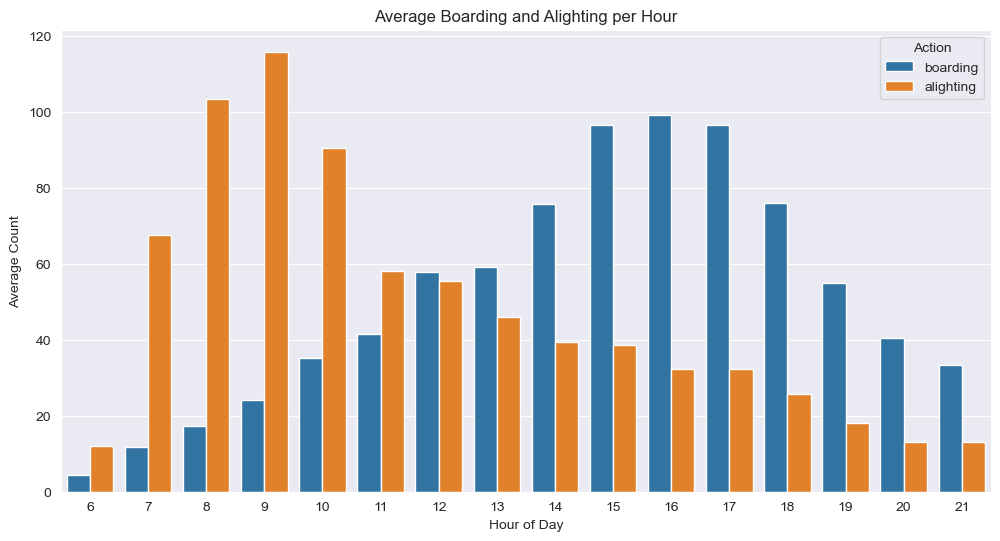

In [4]:
import seaborn as sns

# Group by hour_of_day and calculate mean for boarding and alighting
grouped_by_hour = ut_metro.groupby('hour_of_day')[['boarding', 'alighting']].mean().reset_index()

# Plotting combined bar plot for both boarding and alighting per hour
plt.figure(figsize=(12, 6))
sns.barplot(x='hour_of_day', y='value', hue='variable', data=pd.melt(grouped_by_hour, ['hour_of_day']))
plt.title('Average Boarding and Alighting per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Count')
plt.legend(title='Action')
plt.show()


The UT Bus should consider adding more buses between 15:00 and 17:00, as this is the peak departure time for students. Additionally, increasing the bus frequency during the morning, especially between 8:00 and 10:00, would accommodate the majority of students arriving on campus.

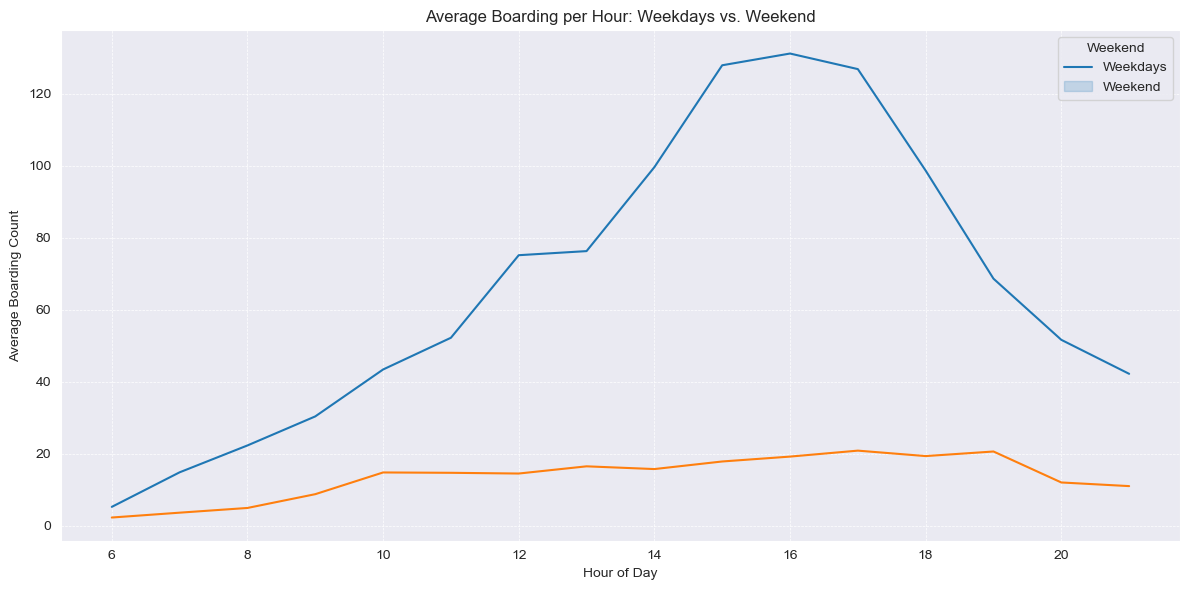

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

ut_metro = pd.read_csv('capmetro_UT.csv')

# change timestamp to datetime
ut_metro['timestamp'] = pd.to_datetime(ut_metro['timestamp'])

# group by month and weekend, and calculating the total boarding number
ut_metro_grouped = ut_metro.groupby(['month', 'weekend'])['alighting'].sum().reset_index()

ut_metro_grouped['month'] = pd.Categorical(ut_metro_grouped['month'], categories=['Sep', 'Oct', 'Nov'], ordered=True)

# make barplot, showing different month of boarding number
plt.figure(figsize=(10, 6))
sns.barplot(data=ut_metro_grouped, x="month", y="alighting", hue="weekend")
plt.title('Monthly Alighting Counts for Weekdays and Weekends')
plt.ylabel('Boarding Count')
plt.show()


From this plot, it's evident that October has the highest number of alighting, suggesting that there may be numerous school activities or a significant course load prompting students to frequent the campus. The trend seems consistent over the weekends as well.

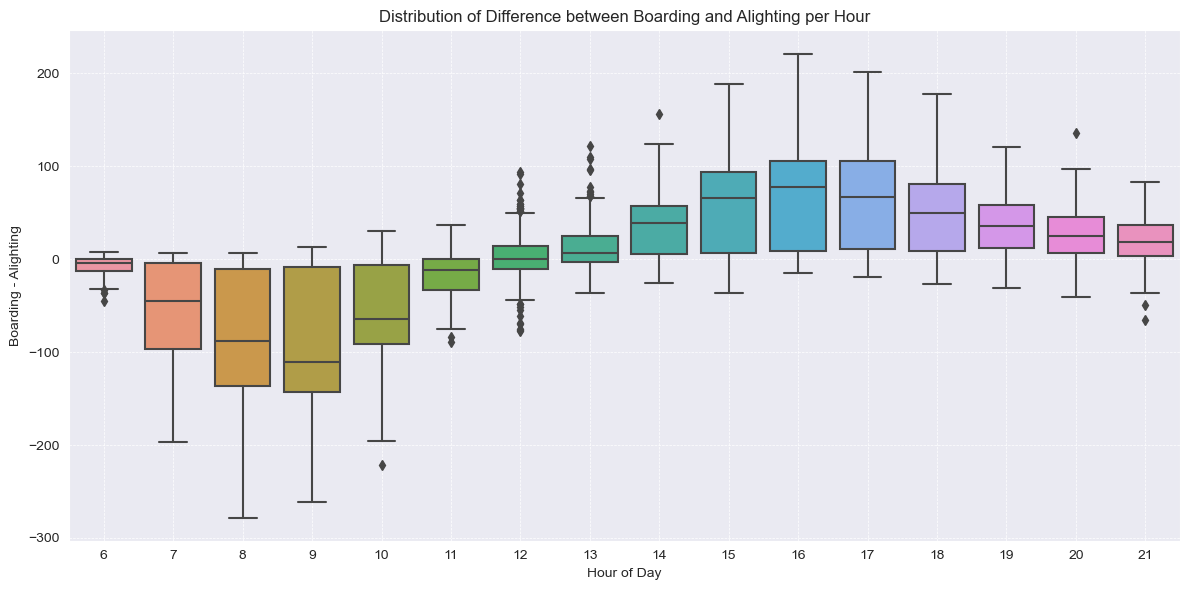

In [6]:
# Visualization 3: Ridership vs Temperature
plt.figure(figsize=(12, 6))
sns.scatterplot(data=ut_metro, x='temperature', y='alighting', hue='hour_of_day', palette='viridis', size='hour_of_day', sizes=(10, 200))
plt.title('Alighting vs Temperature with Hour of Day as size')
plt.show()

# Visualization 3: Ridership vs Temperature
plt.figure(figsize=(12, 6))
sns.scatterplot(data=ut_metro, x='temperature', y='boarding', hue='hour_of_day', palette='viridis', size='hour_of_day', sizes=(10, 200))
plt.title('Boardings vs Temperature with Hour of Day as size')
plt.show()

From the two plots, it's evident that temperature has minimal correlation with the number of boardings and alightings. The first graph illustrates the relationship between temperature and arriving passengers. Remarkably, there's a consistent number of arrivals at 7, suggesting students arrive at school at this time regardless of the temperature. The second plot further underscores that, irrespective of how warm or chilly it is, students predominantly leave school in the afternoon.

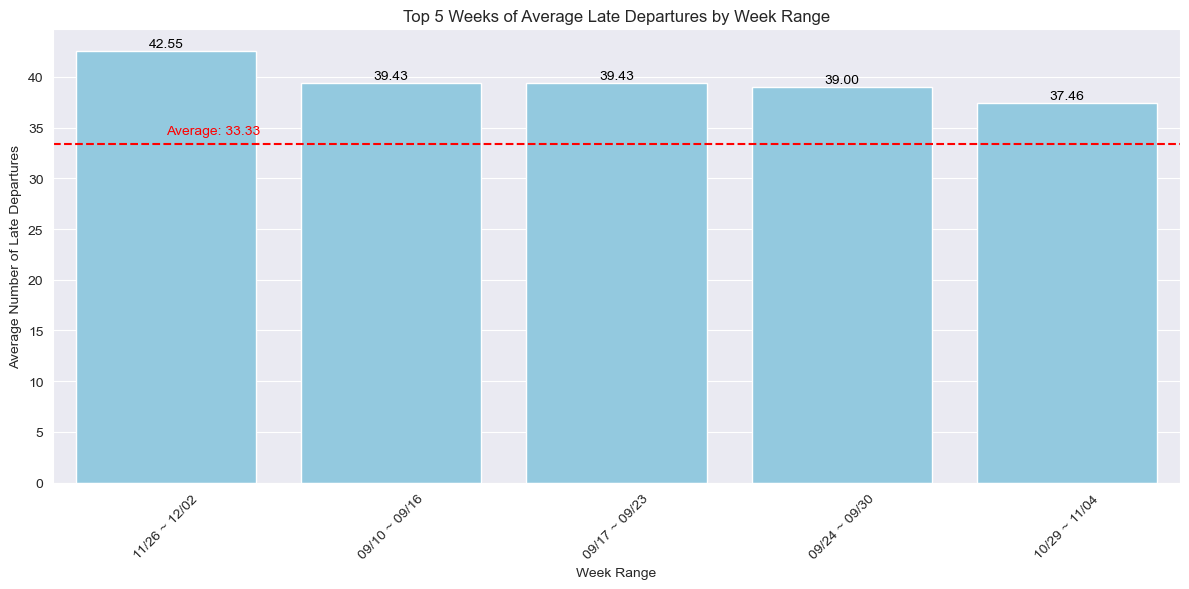

In [13]:
# Ensure that 'timestamp' is of type datetime64
ut_metro['timestamp'] = pd.to_datetime(ut_metro['timestamp'])

# Filter for records after 21:00
ut_metro_late = ut_metro[ut_metro['hour_of_day'] > 20]

# Define average number of student leave the campus
avg_late = ut_metro_late['boarding'].mean()

# Adjust timestamps by subtracting a day, then resample
ut_metro_late.set_index('timestamp', inplace=True)
ut_metro_late_weekly_avg = ut_metro_late.resample('W-SUN')['boarding'].mean().sort_values(ascending=False).head(5).reset_index()

# Adjust the 'timestamp' column back to the start of the week
ut_metro_late_weekly_avg['timestamp'] = ut_metro_late_weekly_avg['timestamp'] - pd.DateOffset(days=6)

# Create a 'week' column for visualization purposes
ut_metro_late_weekly_avg['week'] = ut_metro_late_weekly_avg['timestamp'].dt.strftime('%m/%d') + " ~ " + (ut_metro_late_weekly_avg['timestamp'] + pd.DateOffset(days=6)).dt.strftime('%m/%d')

# Plot setup
plt.figure(figsize=(12, 6))

# Plot the top 10 weeks based on average 'alighting' 
ax = sns.barplot(x='week', y='boarding', data=ut_metro_late_weekly_avg, color='skyblue')

# Draw the average line and annotate
plt.axhline(avg_late, color='r', linestyle='--')
plt.annotate(f'Average: {avg_late:.2f}', xy=(0, avg_late + 1), color='red')

# Annotate each bar with its average value
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Title and labels
plt.title('Top 5 Weeks of Average Late Departures by Week Range')
plt.xlabel('Week Range')
plt.ylabel('Average Number of Late Departures')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


The plot represents the top 5 weeks for late departures. This could be attributed to special activities during these periods, or possibly the final exam season.